# 3장 시카고 샌드위치 맛집 분석
2장까지 우리가 다룬 데이터는 엑셀이든 텍스트든 파일의 형태였습니다. 그리고 우리는 파이썬과 몇몇 모듈의 기초에 집중하면서 뭔가 성과를 얻기 위해 노력했습니다. 이제 3장부터는 데이터를 인터넷에서 직접 얻는 과정을 이야기하려 합니다. 이를 거창하게 웹 스크래핑(Web Scraping)이라고 하지 않더라도 단지 원하는 정보 한줄을 얻는 과정이라도 기초를 알고 가야 합니다. 1,2장과 달리 이번장은 인터넷에서 웹페이지의 내용을 가져오는 Beautiful Soup라는 모듈의 기초부터 익히고, 이번장의 목표인 시카고 샌드위치 맛집 리스트를 정리하려고 합니다. 물론 그 과정에서도 익히고 배워야 할 것이 있습니다.

In [1]:
from bs4 import BeautifulSoup

BeautifulSoup에서 bs4를import합니다.

In [2]:
page = open("data/03. test_first.html",'r').read()
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


지금 파일로 다운받은 html을 읽는 것이기 때문에 open 명령으로 읽기 옵션('r')을 주고 읽으면 됩니다. 읽은 html 페이지의 내용을 전체 다 보고 싶으면. prettify()라는 옵션을 사용하면 들여쓰기가 되어 보기 좋게 나타납니다. 지금 위 코드에서 예제로 사용되는 전체 html코드를 soup라는 변수에 저장했는데. 그 soup라는 변수에서 한 단계 아래에서 포함된 태그들을 알고 싶으면 children이라는 속성을 사용하면 됩니다.

In [3]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

In [4]:
html = list(soup.children)[2]
html

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

이때 soup는 문서 전체를 저장한 변수이기 때문에 그 안에서 html태그에 접속하고 싶다면, 위와 같이 접근할 수 있습니다. <br>
그러면 위와 같은 결과를 얻게 됩니다. 다시 html의 children을 조사해보면

In [5]:
list(html.children)

['\n',
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>,
 '\n',
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>,
 '\n']

In [6]:
body = list(html.children)[3]
body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

이렇게 children과 parent를 이용해서 태그를 조사할 수 있고 그냥 한 번에 나타낼 수도 있습니다.

In [7]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

이렇게 바로 찾을 수도 있습니다.

In [8]:
list(body.children)

['\n',
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>,
 '\n',
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 '\n',
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>,
 '\n']

또한 body 태그 안에 children의 리스트를 확인할 수 있습니다. 리스트 자료형에 대해서는 뒤에서 다시 다루겠습니다. 지금은 그냥 배열 정도로 생각하고 넘어가겠습니다. 위 코드에서 접근한 대로 단계별로 접근하고 다시 그 구조를 코드 속에 담아주는 것은 체계적으로 생각하고 접근할 수 있는 장점이 있지만, 복잡하고 큰 크기의 페이지를 접근하는 것에는 쉽지 않습니다. 만약 접근해야 할 태그를 알고 있다면 find나 find_all 명령을 많이 사용하게 됩니다.

In [9]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

위와 같은 모든 p 태그를 찾는 것입니다. 물론 하나만 찾을 때는 find 명령을 사용할 수 있습니다.

In [10]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

이렇게 사용하면 제일 첫 번째 p 태그를 찾아줍니다.

In [11]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

이렇게 p 태그의 class가 outer-text인 것을 찾는 것도 가능합니다.

In [12]:
soup.find_all(class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

혹은 그냥 class 이름으로만 outer-text를 찾을 수도 있습니다.

In [13]:
soup.find_all(id='first')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

또 id가 first인 태그들을 찾을 수도 있습니다.

In [14]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

그러나 find 명령은 제일 처음 나타난 태그만 찾아주기 때문에 그 다음 태그만 찾고 싶을 때는 다른 방법을 사용해야 합니다.

In [15]:
soup.head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

soup의 head에 있는 내용입니다. 여기서 next_sibling이라는 명령을 사용할 수 있습니다.

In [16]:
soup.head.next_sibling

'\n'

soup의 head 다음에 줄바꿈 문자가 있습니다.

In [17]:
soup.head.next_sibling.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

다시 한 번 더 이렇게 head와 같은 위치에 있던 body 태그로 접근할 수 있습니다.

In [18]:
body.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

또한 제일 처음 나타나는 p 태그에 대해, 위와 같이 next_sibling을 두번 걸면 그 다음 p 태그로 이동할 수 있다는 것을 알 수 있습니다.

In [19]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



또 get_text() 명령으로 태그 안에 있는 텍스트만 가지고 올 수 있습니다.

In [20]:
body.get_text()

'\n\n\n                Happy PinkWink.\n                PinkWink\n\n\n                Happy Data Science.\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                All I need is Love.\n            \n\n'

body 전체에서 get_text()를 하면 태그가 있던 자리는 줄바꿈(\n)이 표시되고 전체 텍스트를 보여줍니다.

In [21]:
links = soup.find_all('a')
links

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <a href="https://www.python.org" id="py-link">Python</a>]

클릭 가능한 링크를 의미하는  a 태그를 찾았습니다.

In [22]:
for each in links:
    href = each['href']
    text = each.string
    print(text + '->' + href)

PinkWink->http://www.pinkwink.kr
Python->https://www.python.org


## 3-2 크롬 개발자 도구를 이용해서 원하는 태그 찾기
웹 페이지의 태그를 beautiful soup의 결과만 보면서 확인할 수는 없습니다. 원하는 곳의 태그가 무엇인지 확인하는 방법 중 간편한 방법이 웹 브라우저인 크롬의 개발자 도구를 사용하는 것입니다. https://finance.naver.com/marketindex/로 접속합니다. 거기서 미국 USB 1,179.60원 이라는 글자에서 환율을 가져오려고 합니다.

In [23]:
from urllib.request import urlopen

먼저 url로 접근하는 경우 urllib에서 urlopen이라는 함수를 import해둡니다.

In [24]:
url = "https://finance.naver.com/marketindex/"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20211021173707/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20211021173707/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 U

그리고 해당 페이지를 읽어옵니다. prettify()로  print를 해도 사실 확인하기는 쉽지 않습니다.어차피 우리는 접근해야할 태그를 알아 두었으니 아래와 같이 접근하면 됩니다.

In [25]:
soup.find_all('span','value')[0].string

'1,176.00'

혹시 몰라서 find_all로 찾고 리스트로 결과가 반환되니까 첫 번째를 선택하도록 했습니다.

## 3-3 실전: 시카고 샌드위치 맛집 소개 사이트에 접근하기
이제 시카고의 베스트 샌드위치 가게를 소개하고 있는 시카고 매거진 홈페이지에 접속해서 샌드위치 가게 정보를 얻어올 생각입니다.

일단, 접속 주소는 http://goo.gl/wAtvls입니다. 원래 긴 주소인데 구글의 URL Shortener를 사용했습니다.

In [26]:
import requests
from bs4 import BeautifulSoup 
from urllib.request import urlopen

headers = {'User-Agent': 'Mozilla/5.0'}

url = 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'

html = requests.get(url, headers = headers).text

soup =  BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>The 50 Best Sandwiches in Chicago – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:ho

위 코드를 입력하면 전체 html코드를 다 받게 됩니다. 그리고 url_base, url_sub로 분리하고 다시 url로 합친 이유는 단지 책에서 표현하려다 보니 한 페이지에 주소가 다 안 나와서 입니다.

In [27]:
print(soup.find_all('div','sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-R

확인한 태그를 이용해서 find_all 명령을 이용해서 div의 Sammy 태그를 찾아 보았습니다. 내용을 유심히 보니 우리가 찾으려고 하던 내용이 맞는 것 같습니다. 더 확실히 하기 위해 len명령으로 길이를 확인해보면 50이라고 나타납니다.

In [28]:
len(soup.find_all('div','sammy'))

50

애초 시카고 매거진의 기사 제목에 있지만 맛집 50개이므로 저 길이가 50이라면 일단 정확하게 찾은것 같습니다. 그중 첫 번째 것만 확인해보면 원하던 정보가 다 있는 걸로 보입니다.

In [29]:
print(soup.find_all('div','sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>


## 3-4 접근한 웹 페이지에서 원하는 데이터 추출하고 정리하기
그럼 이제 div의 sammy 태그에서 우리가 원하는 정보를 얻는 과정을 보겠습니다.

In [30]:
tmp_one = soup.find_all('div','sammy')[0]
type(tmp_one)

bs4.element.Tag

find_all로 찾은 결과는 bs4.element.Tag라고 하는 형태로 이런 경우 그 변수에 다시 태그로 찾는 (find, find_all)명령을 사용할 수 있습니다.

In [31]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

그래서 find 명령을 한 번 더 사용하고 sammyRank를 찾아보면 나타납니다. 여기서 text만 취하면 됩니다.

In [32]:
tmp_one.find(class_='sammyRank').get_text()

'1'

get_text() 명령을 사용하면 됩니다. 그러면 랭킹은 얻을 수 있습니다.

In [33]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\nOld Oak Tap\nRead more '

이제 sammyListing을 얻으면 메뉴 이른과 가게 이름이 비록 같이 나오긴 했지만 억게 되었습니다.

In [34]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

또 a 태그에서 href정보를 가지고 클릭했을 때 연결될 주소도 저장할 수 있습니다.<br>
코드 [37]의 경우는 메뉴 이름과 가게 이름이 같이 있어서 분리해야 합니다. 저 구조에서 쉽게 접근해 볼 수 있는 것 중 하나가'정규식(Regular Express)'입니다. 정규식이라고 너무 어렵게 받아들일 필요는 없습니다. 이 책의 기본적인 기초는'필요한 건 의미만 파악되면 가져다 쓰지'입니다.

In [35]:
import re

tmp_string = tmp_one.find(class_='sammyListing').get_text()

re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0])
print(re.split(('\n|\r\n'), tmp_string)[1])

BLT
Old Oak Tap


먼저 당연히 정규식을 쓰기 위해 import re를 수행합니다. 그리고re에서 사용할 명령은 딱 하나 split입니다 . 말그대로 내가 지정한 특정 패턴이 일치하면 분리시킵니다. 저는 \n이거나, \r\n이면 분리시키고 싶습니다. 그래서 OR연산자(|-통상 키보드에서 엔터키 위에 있는 \ 기호와 함께 있는 문자)까지 사용해서 re.split(('\n|\r\n',tmp_string)이라고 명령했습니다. 그러면 그 결과가 두 개가 되는데 첫번째 것을 메뉴 이름으로, 두 번째 것을 가게 이름으로 하면 됩니다.<br>
또 코드[38]의 결과가 다른 49개에 적용했을 때 항상 동일하지 않습니다. 그 결과가 어떤 경우는 상대 경로로, 또 어떤 경우는 절대경로로 나오기 때문입니다. 이럴 때 사용하는 것이 urllib에 있는  urljoin이라는 명령입니다. 이 명령을 이용하면 절대경로로 잡힌 url은 그래로 두고 상대경로로 잡힌 url은 절대 경로로 변경할 수 있습니다.

In [36]:
from urllib.parse import urljoin

In [37]:
rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = item.find(class_='sammyListing').get_text()

    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url, item.find('a')['href']))

위 코드는 먼저 랭크 순위(rank), 메인 메뉴 이름(main_menu), 카페이름(cafe_name), 각각의 접근 주소(url_add)를 저장할 빈 list를 두었습니다. 그리고 find_all('div','sammy')로 찾은 50개의 정보를 가지고 반복문(for)을 돌리면서 방금 했던 내용인 각각의 정보를 .append명령으로 빈 리스트에 하나씩 추가하도록 했습니다. 이코드가 다 수행되고 나면,

In [38]:
rank[:5]

['1', '2', '3', '4', '5']

순위도 잘 저장되어있고,

In [39]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

메뉴 이름도,

In [40]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

카페 이름도 잘 받아왔습니다.

In [41]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

마지막으로 url도 잘 왔습니다.

In [42]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

혹시나 하고 네 개의 변수의 길이를 조사해도 괜찮아 보입니다. 이제 이 데이터를 4개의 리스트에 저장할 수는 없으니 pandas를 이용하도록 하겠습니다

In [43]:
import pandas as pd

data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Cafe,URL
0,1,BLT,Old Oak Tap,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Fried Bologna,Au Cheval,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Woodland Mushroom,Xoco,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Roast Beef,Al’s Deli,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,PB&L,Publican Quality Meats,http://www.chicagomag.com/Chicago-Magazine/Nov...


이렇게 각 컬럼의 이름을 정의하고 해당 자료를 알려주면 됩니다.<br>
잘 나타난 것 같습니다. pandas로 정리도 잘 됐습니다. 그런데 하나 아쉬운 것은 컬럼의 순서입니다. 그래서 그 순서도 보기 좋게 정리합니다.

In [44]:
df = pd.DataFrame(data, columns=['Rank','Cafe','Menu','URL'])
df.head(5)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


이렇게 결과가 나타납니다. 이렇게 일차적으로 한 페이지에서 각 원하는 부분의 데이터를 읽어와서 다시 원하는 형태로 정리를 완료했습니다. 여기서 한 단계 더 나가도록 하겠습니다. 그 전에 혹시 모르니 먼저 저장합니다.

In [45]:
df.to_csv('data/03. best_sandwiches_list_chicago.csv', sep=',', encoding='UTF-8')

## 3-4 다수의 웹 페이지에 자동으로 접근해서 원하는 정보 가져오기
3-3절까지 시카고 매거진에서 시카고의 베스트 샌드위치 가게 50개에 대한 정보를 가져오는 페이지를 만들었습니다. html페이지로는 하나여서 페이지 간 이동은 필요가 없었습니다. 그저 한 페이지의 내용을 잘 이해하고 가져오면 되는데, 세부 메뉴를 설명하는 곳을 클릭하면 각각의 또 다른 매거진 기사로 연결됩니다.

In [46]:
df = pd.read_csv('data/03. best_sandwiches_list_chicago.csv', index_col=0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


이전에 작업했던 것을 읽어옵니다. 위 표에서 URL 컬럼에 있는 내용을 50개 읽어서 각 페이지에서 가게 주소, 대표 샌드위치 가격, 가게 전화번호를 얻는 것입니다. 그러면 첫 번째 URL 정보를 확인하고 연습 삼아 진행한 다음 50개에 대해 반복문을 적용하겠습니다.

In [47]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

첫 번째 URL이 있습니다. 시카고 매거진의 또 다른 페이지입니다. 이 주소를 Beautiful Soup로 읽습니다.

In [48]:
headers = {'User-Agent': 'Mozilla/5.0'}

url = (df['URL'][0])

html = requests.get(url, headers = headers).text

soup_tmp =  BeautifulSoup(html, "html.parser")
soup_tmp

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>1. Old Oak Tap BLT – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_ss

In [49]:
print(soup_tmp.find('p', 'addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


원하는 정보가 다 있습니다. 주소와 가격과 전화번호까지 있습니다. 그럼 이상태에서 텍스트(text)로 가지고와서 빈 칸으로 나누면 될 것 같습니다.

In [50]:
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

일단.get_text()로 가지고 왔습니다. 원하는 내용은 다 있습니다.

In [51]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

그리고 split()을 적용해보면 위 결과처럼 나타납니다. 여기서 빨리 눈치를 채야 하는 것은 각격은 제일 첫 번째라는 것입니다. 그리고 가운데가 주소의 체계에 따라 칸 수가 바뀔 수는 있지만 제일 뒤는 웹 주소고, 제일 뒤에서 두 번째는 전화번호입니다. 파이썬 리스트에서 제일 뒤는-1로 호출할 수 있습니다. 일단 먼저 가격을 가지고 왔습니다.

In [52]:
price_tmp.split()[0]

'$10.'

맨 위에 점(.)이 항상 붙어서 아래와 같이 사용하기로 합니다.

In [53]:
price_tmp.split()[0][:-1]

'$10'

이제 코드 [105]를 기준으로 두 번째부터 맨 마지막에서 세 번째까지 선택하고 싶은데 그렇게 해도 list형인 것은 변함없습니다. 바로 하나의 문장을 만들고 싶은 것입니다. 이럴 때 사용하는 명령이 join명령입니다.

In [54]:
''.join(price_tmp.split()[1:-2])

'2109W.ChicagoAve.,'

이렇게 사용할 수 있습니다. 바로 주소가 되는 것입니다.

## 3-10 네이버 영화 평점 기준 영화의 평점 변화 확인하기
네이버에서는 영화 평점을 보여주는 사이트가 있습니다. 여기서는 인기 있는 영화를 알아볼 수도 있지만 지난 날짜의 인기도 확인할 수 있습니다. https://goo.gl/f5cHRG에 접근해보면 영화 평점순으로 정렬되어 있는 정보를 만날 수 있습니다. 여기서 크롬 개발자 도구를 사용해서 영화 제목이 나오는 부분의 태그를 확인합니다.

In [55]:
from bs4 import BeautifulSoup
import pandas as pd

우선 간단하게 Beautiful Soup와 pandas를 import합니다.

In [56]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

해당 주소를 한번 읽어보겠습니다. 앞에서도 이야기했지만 책으로 출판하다 보니 코드가 길어 스크롤되는 문제가 있어서 url_base+url_sub와 같이 표현한 것뿐입니다.

In [57]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>,
 <div class="tit5">
 <a href="/movi

In [58]:
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

이렇게 제목만 찾을 수 있습니다.

In [59]:
soup.find_all('td','point')[0].string

'9.32'

그다음은 포인트를 찾을 수 있습니다.

In [60]:
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

이제 날짜를 5월 1일부터 100일간으로 정의하고 그 날짜에 해당하는 영화 정보 전체를 찾도록 하겠습니다.

In [61]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

/tmp/ipykernel_1476/3666733401.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


  0%|          | 0/100 [00:00<?, ?it/s]

어렵지 않습니다. 변수 html을 지정할 때 중괄호 {}로 date라고 잡은 것은 그 밑에 response라는 변수에서 {date}를 변수로 취급하고 내용을 바꿀 것이기 때문입니다. 그러고 나서 제목과 포인트를 읽어왔습니다.

In [62]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie['point'] = movie['point'].astype(float)
movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


읽은 내용을 pandas로 저장합니다. 이 내용에는 날짜별로 영화와 포인트가 저장되어 있을 것입니다. 만약 날짜가 아니라 영화별로 점수의 합산으로 데이터를 보고 싶다면 pivot_table을 사용하면 됩니다.

In [63]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


여기서 aggfunc으로 np.sum을 이용해서 합산을 해야 영화별 점수의 합계로 정렬될 것입니다. 5월1일 부터 100일간 점수의 합산으로 볼 때 코드[18]의 결과를 보면 고득점 영화 1위부터 5위가 보입니다.

In [64]:
tmp = movie.query('name == ["노무현입니다"]')
tmp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


혹은 위 코드처럼'노무현입니다'라는 영화만 추려서 확인할 수 있습니다. 날짜별 평점의 변화를 확인할 수 있습니다.

No handles with labels found to put in legend.


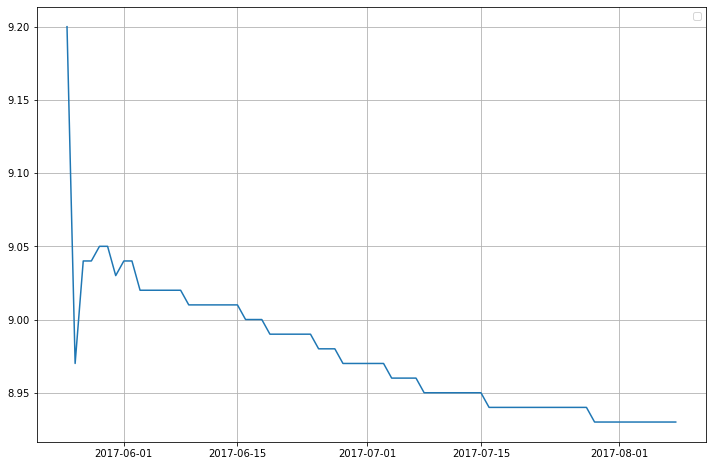

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

당연히 이것만 날짜별로 그려볼 수 있습니다. 결과는 위 그래프와 같습니다.

## 3-11 영화별 날짜 변화에 따른 평점 변화 확인하기

In [72]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], values=['point'])

movie_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

날짜별로 정리되어 있던 데이터를 pivot_table을 이용해서 코드[22]에서처럼 손쉽게 세로축으로 날짜를, 가로축에 영화 제목을 넣을 수 있습니다.

In [73]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [74]:
movie_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


이 데이터에서 pivot_table의 결과로 붙은 컬럼 제목을 하나 정리하겠습니다.

In [75]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


matplotlib에서의 한글 문제를 설정합니다.

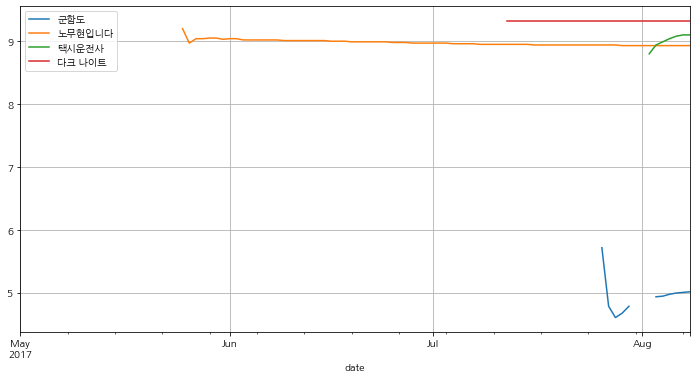

In [76]:
movie_pivot.plot(y=['군함도', '노무현입니다','택시운전사','다크 나이트'], figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()

관심 있는 영화 몇개를 지정해서 날짜별 변화를 확인해보겠습니다.<br>
결과는 위와 같습니다.'노무현입니다'와'택시운전사'의 성과가 눈에 보입니다. 그리고 그 변화 추이도 알 수 있습니다. 한참 논란이 되는'군함도'의 평점 결과도 나타나고 있습니다. 비록 늦은 감이 분명 있지만, 이런 영화(노무현입니다,택시운전사)들이 주목받고 높은 평점을 유지한다는 사실을 직접 확인 할 수 있따는 것이 참으로 다행입니다.

출처 : "파이썬으로 데이터 주무르기"